In [1]:
import pandas as pd
import numpy as np
# from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
# df1=pd.read_csv("D:/LY PROJECT/dataset/techdata.csv")
df1=pd.read_csv("D:/LY PROJECT/dataset/scsmotetech.csv")
# df3=pd.read_csv("D:/LY PROJECT/dataset/datawithcossmote.csv")

In [5]:
df1.head(2)

,Unnamed: 0,category,text,cleaned_text,no of matched keywords,words matched,percent,category_predicted
0,0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,68,"['tv', 'system', 'tv', 'digital', 'video', 'ro...",18.328841,technology
1,1,not technical,worldcom boss left books alone former worldc...,worldcom boss leave book worldcom boss bernie ...,2,"['phone', 'company']",1.162791,not technology


In [6]:
df1['category'].value_counts()

not technical    1824
tech              401
Name: category, dtype: int64

In [7]:
df1['category_predicted'].value_counts()

not technology    1829
technology         396
Name: category_predicted, dtype: int64

<H3>DATA CLEANING</H3>

In [8]:
df=df1[["category","cleaned_text","category_predicted"]]
df

,category,cleaned_text,category_predicted
0,tech,tv future hand viewer home theatre system plas...,technology
1,not technical,worldcom boss leave book worldcom boss bernie ...,not technology
2,not technical,tiger wary farrell gamble leicester rush make ...,not technology
3,not technical,yeade face newcastle fa cup premiership newcas...,not technology
4,not technical,ocean s raid box office ocean s crime caper se...,not technology
...,...,...,...
2220,not technical,car pull retail figure retail sale fall januar...,not technology
2221,not technical,kilroy unveil immigration policy ex chatshow h...,not technology
2222,not technical,rem announce new glasgow concert band rem anno...,not technology
2223,not technical,political squabble snowball s commonplace argu...,not technology


In [9]:
df['cat_id']=df1['category']
df['cat_id_smote']=df2['category_predicted']
df['cat_id'].replace({'tech':1,"not technical":0},inplace=True)
df['cat_id_smote'].replace({'technology':1,"not technology":0},inplace=True)
df

C:\Users\hetul\AppData\Local\Temp/ipykernel_14252/3596375301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat_id']=df1['category']
C:\Users\hetul\AppData\Local\Temp/ipykernel_14252/3596375301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat_id_smote']=df2['category_predicted']
C:\Users\hetul\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

,category,cleaned_text,category_predicted,cat_id,cat_id_smote
0,tech,tv future hand viewer home theatre system plas...,technology,1,1
1,not technical,worldcom boss leave book worldcom boss bernie ...,not technology,0,0
2,not technical,tiger wary farrell gamble leicester rush make ...,not technology,0,0
3,not technical,yeade face newcastle fa cup premiership newcas...,not technology,0,0
4,not technical,ocean s raid box office ocean s crime caper se...,not technology,0,0
...,...,...,...,...,...
2220,not technical,car pull retail figure retail sale fall januar...,not technology,0,0
2221,not technical,kilroy unveil immigration policy ex chatshow h...,not technology,0,0
2222,not technical,rem announce new glasgow concert band rem anno...,not technology,0,0
2223,not technical,political squabble snowball s commonplace argu...,not technology,0,0


In [10]:
df.cat_id.value_counts()

0    1824
1     401
Name: cat_id, dtype: int64

In [11]:
df.cat_id_smote.value_counts()

0    1829
1     396
Name: cat_id_smote, dtype: int64

In [ ]:
# from wordcloud import WordCloud,STOPWORDS
# plt.figure(figsize=(40,25))
# subset = df1[df1['category']=='drug']
# text = subset.cleaned_website_text.values
# cloud1=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(2,2,1)
# plt.axis('off')
# plt.title("Drugs",fontsize=40)
# plt.imshow(cloud1)
# subset = df[df['category']=='non drug']
# text = subset.cleaned_website_text.values
# cloud2=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(2,2,2)
# plt.axis('off')
# plt.title("Non-Drug",fontsize=40)
# plt.imshow(cloud2)

In [12]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 1), stop_words='english')

# We transform each cleaned_text into a vector
features = tfidf.fit_transform(df.cleaned_text).toarray()

print("Each of the %d text is represented by %d features (TF-IDF score of unigrams)" %(features.shape))

Each of the 2225 text is represented by 6864 features (TF-IDF score of unigrams)


In [13]:
labels_2 = df.cat_id_smote
labels_1 = df.cat_id

In [14]:
model1 = LogisticRegression()
model2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model3 = LinearSVC()


==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- LOGISTIC REGRESSION

ACCURACY:  0.9245960502692998
               precision    recall  f1-score   support

         tech       0.97      0.60      0.74        99
not technical       0.92      1.00      0.96       458

     accuracy                           0.92       557
    macro avg       0.94      0.80      0.85       557
 weighted avg       0.93      0.92      0.92       557



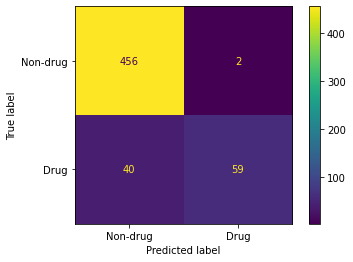


==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- RANDOM FOREST

ACCURACY:  0.8779174147217235
               precision    recall  f1-score   support

         tech       1.00      0.31      0.48        99
not technical       0.87      1.00      0.93       458

     accuracy                           0.88       557
    macro avg       0.94      0.66      0.70       557
 weighted avg       0.89      0.88      0.85       557



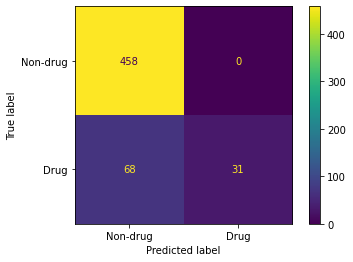


==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- SUPPORT VECTORS

ACCURACY:  0.9587073608617595
               precision    recall  f1-score   support

         tech       0.92      0.84      0.88        99
not technical       0.97      0.98      0.98       458

     accuracy                           0.96       557
    macro avg       0.94      0.91      0.93       557
 weighted avg       0.96      0.96      0.96       557



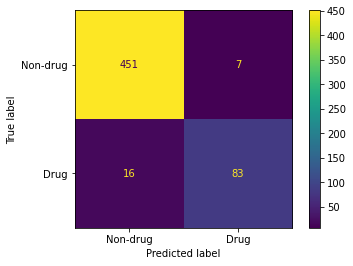

In [15]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, labels_2,df.index, test_size=0.25, 
                                                               random_state=1,stratify=labels_2)
model1.fit(X_train, y_train)
y_pred_S1 = model1.predict(X_test)
print('\n==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- LOGISTIC REGRESSION\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_S1))
# Classification report
print(metrics.classification_report(y_test,y_pred_S1,labels=[1,0],target_names= df['category'].unique()))
#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_S1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Non-drug','Drug'])
cm_display.plot()
plt.grid(False)
plt.show()

model2.fit(X_train, y_train)
y_pred_S2 = model2.predict(X_test)
print('\n==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- RANDOM FOREST\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_S2))
# Classification report
print(metrics.classification_report(y_test,y_pred_S2,labels=[1,0],target_names= df['category'].unique()))
#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_S2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Non-drug','Drug'])
cm_display.plot()
plt.grid(False)
plt.show()

model3.fit(X_train, y_train)
y_pred_S3 = model3.predict(X_test)
print('\n==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- SUPPORT VECTORS\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_S3))
# Classification report
print(metrics.classification_report(y_test,y_pred_S3,labels=[1,0],target_names= df['category'].unique()))
#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_S3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Non-drug','Drug'])
cm_display.plot()
plt.grid(False)
plt.show()

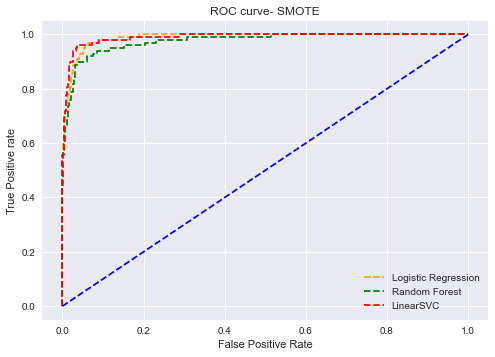

In [16]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3._predict_proba_lr(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr11, tpr11, thresh11 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr21, tpr21, thresh21 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr31, tpr31, thresh31 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr11, tpr11, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr21, tpr21, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr31, tpr31, linestyle='--',color='red', label='LinearSVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve- SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
